In [1]:
from sympy import symbols, init_printing
init_printing()
from celmech.hamiltonian import HamiltonianPoincare
from celmech.transformations import poincare_vars_from_sim

In [2]:
import rebound
import numpy as np

def make_sim(j, k):
    mass = 1.e-5
    e0 = 0.01 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, pomega = np.pi/2., P=1.)
    sim.add(m=4*mass, e=1.e-5, P=j/float(j-k))
    sim.add(m=mass, e=e0, P=5.)
    sim.move_to_com()
    return sim

j=5
k=1
sim = make_sim(j,k)

In [3]:
Hsim = HamiltonianPoincare()
Hsim.initialize_from_sim(sim)

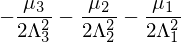

In [4]:
Hsim.H

In [5]:
Hsim.add_all_resonance_subterms(1,2,j,k)

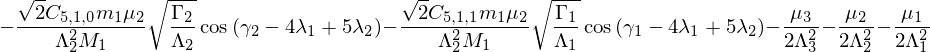

In [6]:
Hsim.H

In [7]:
Norbits = 300
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

Nsol = np.zeros((4*(sim.N-1), Nout))
symsol = np.zeros((4*(sim.N-1), Nout))
for i, time in enumerate(times):
    sim.integrate(time)
    Hsim.integrate(time)
    Nsol[:,i] = poincare_vars_from_sim(sim)
    symsol[:,i] = list(Hsim.integrator.y)

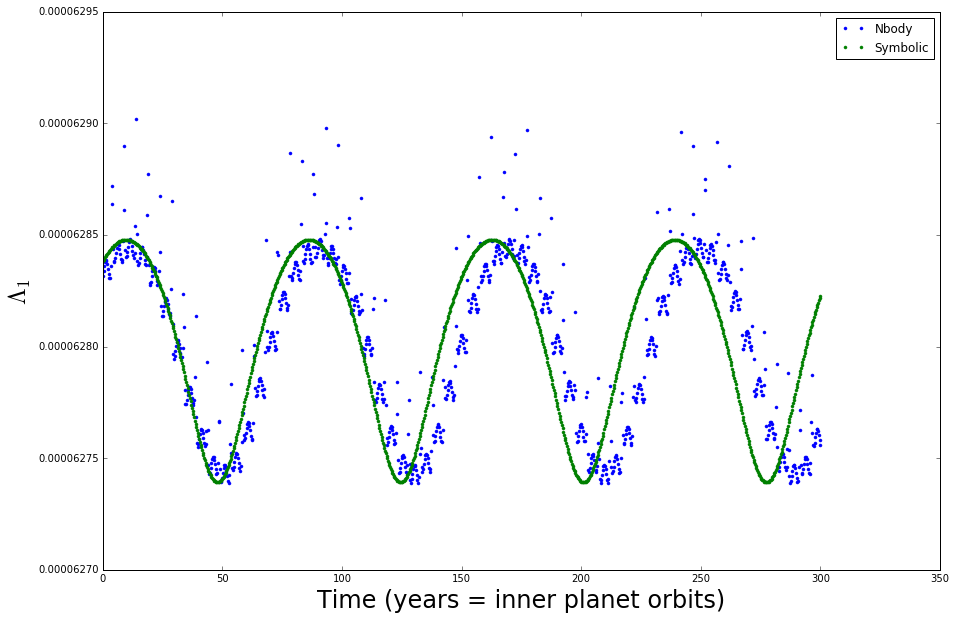

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, Nsol[0,:], '.', label='Nbody')
ax.plot(times, symsol[0,:], '.', label='Symbolic')

ax.legend()

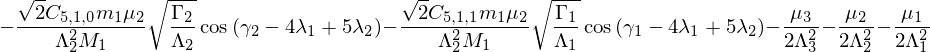

In [9]:
Hsim.H

In [11]:
from celmech import transformations

In [32]:
pvars=[:8]

In [64]:
%run -i celmech/transformations

pvars=np.array(transformations.poincare_vars_from_sim(sim))
n1,n2=sim.particles[1].n,sim.particles[2].n
m1,m2=sim.particles[1].m,sim.particles[2].m
Mstar=sim.particles[0].m
G=sim.G
print pvars
poincare_vars_to_andoyer_vars(pvars[:8],G,Mstar,m1,m2,n1,n2,5,1,actionScale=pvars[0]/2)

[  6.27561135e-05  -2.12846250e+00   1.75551327e-08  -3.29898160e-01
   2.70825437e-04   5.67146909e+00   4.63894591e-09  -3.04099530e+00
   1.07441735e-04   1.82305104e-03   5.37812703e-09  -2.43472602e-03]
0.000559471634527
0.00068513900416 2.21730765876e-05
[-7.1163177963039194e-06, 523.2807909906594, -0.22679281424100922]
[6.305899007875773, 5.021296757004753]


In [63]:
sim.particles[1].e**2

In [23]:
pvars[1]